In [13]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

# LAB 6 - SHELL-E / NPZD2 Pond with Oxygen

MARI4600/BIO5600: Ecosystem Modelling for Aquaculture (Dalhousie University)

----------------------------------------

**Rendered link:** http://nbviewer.jupyter.org/urls/github.com/Diego-Ibarra/aquaculture-modelling/blob/master/Week6/LAB%206%20-%20SHELL-E%20NPZD2%20Pond%20with%20Oxygen.ipynb

--------------------------------------



### Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab6</span>
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab6</span>:
   * <span class='file'>model_NPZD2_SHELLE.py</span>
   
* In Spyder, change the "working directory" to: <span class='file'>Desktop\Lab6</span>. Note that to change the "working directory", click on "folder icon" on top-right corner.

----------------------------------


### Quick test of our old model_NPZD2_SHELLE.py

Remember our model from last week (<span class='file'>model_NPZD2_SHELLE.py</span>). If you recall, this model can be though as growing ONE mussel inside a 1 $m^3$ container, where Phytoplankton, Zooplankton, Nutrients and Detritus interact with the ONE mussel (temp is constant).


<img src="./SHELLE_NPZD2.png" width="500px">

<br>
<br>

Lets quickly run the model with the default parameters to see if it runs.

<div class="c2c"></div>

Model run: DONE!!!


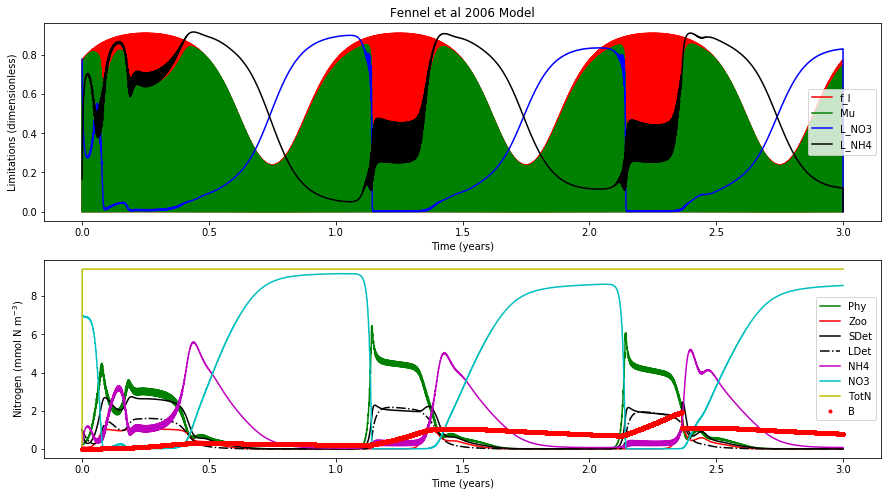

In [14]:
#%% Original model_NPZD2_SHELLE
import model_NPZD2_SHELLE as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
model.plot(output)

-------------------------------

### Improving model_NPZD2_SHELLE.py

In spyder, open <span class='file'>model_NPZD2_SHELLE.py</span> and save it with the following name: <span class='file'>model_NPZD2_SHELLE_improved.py</span>

You can see the final <span class='file'>model_NPZD2_SHELLE_improved.py</span> in <span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week6/model_NPZD2_SHELLE_improved.py" target="__blank">HERE</a></span> 


#### Fixing issue causing negative gonad

In <span class='file'>model_NPZD2_SHELLE_improved.py</span>, do the following modifications:

Replace the following in the `# Update and step` section...

Original:

```         
        # SHELLE
        Soma[t+1] = Soma[t] + (dSomadt * dt)
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt)  - Spawning[t]
        B[t+1] = Soma[t+1] + Gonad[t+1]       
```

Now:

```
        # SHELLE
        Soma[t+1] = Soma[t] + (dSomadt * dt)
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt)  - Spawning[t]
        
        if Gonad[t+1] < 0:# If negative Gonad, take the biomass from Soma instead
            Soma[t+1] = Soma[t+1] + Gonad[t+1]
            Gonad[t+1] = 0. 
        
        B[t+1] = Soma[t+1] + Gonad[t+1]
```

-------------------------

#### Include more variebles in the `output` dictionary. 

In <span class='file'>model_NPZD2_SHELLE_improved.py</span>, do the following modifications:

Replace the following in the `# Pack output into dictionary` section...

Original:

```
    #SHELLE
    output['Soma'] = Soma
    output['Gonad'] = Gonad
    output['B'] = B
    output['Spawning'] = Spawning
    output['Temp'] = Temp
    output['Salt'] = Salt
```

Now:

```
    #SHELLE
    output['Soma'] = Soma
    output['Gonad'] = Gonad
    output['B'] = B
    output['Spawning'] = Spawning
    output['Temp'] = Temp
    output['Salt'] = Salt
    output['Oxy'] = Oxy
    output['L_Temp'] = L_Temp 
    output['L_Salt'] = L_Salt 
    output['L_Oxy'] = L_Oxy
    output['L_Food'] = L_Food 
```


-------------------------

#### Better plotting

In <span class='file'>model_NPZD2_SHELLE_improved.py</span>, do the following modifications:

Replace the following in the `# Plotting` section ...

Original:

```
    # Plotting
    fig, (ax, ax2) = plt.subplots(2,1,figsize=(15, 8))

    ax.plot(output['time']/365,output['f_I'],'r-')
    ax.plot(output['time']/365,output['mu'],'g-')
    ax.plot(output['time']/365,output['L_NO3'],'b-')
    ax.plot(output['time']/365,output['L_NH4'],'k-')
    ax.set_xlabel('Time (years)')
    ax.set_ylabel('Limitations (dimensionless)')
    ax.set_title('Fennel et al 2006 Model')
    ax.legend(['f_I','Mu','L_NO3','L_NH4'])
    
    ax2.plot(output['time']/365,output['Phy'],'g-')
    ax2.plot(output['time']/365,output['Zoo'],'r-')
    ax2.plot(output['time']/365,output['SDet'],'k-')
    ax2.plot(output['time']/365,output['LDet'],'k-.')
    ax2.plot(output['time']/365,output['NH4'],'m-')
    ax2.plot(output['time']/365,output['NO3'],'c-')
    ax2.plot(output['time']/365,output['TotN'],'y-')
    ax2.plot(output['time']/365,output['B'],'r.')
    ax2.set_xlabel('Time (years)')
    ax2.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
    plt.legend(['Phy','Zoo','SDet','LDet','NH4','NO3','TotN','B'])
    plt.show()
```

Now:

```
    # Plotting
    # Plankton NPZD2 ecosystem
    fig1, ax1 = plt.subplots(1,1,figsize=(15, 4))
    ax1.plot(output['time']/365,output['f_I'],'r-')
    ax1.plot(output['time']/365,output['mu'],'g-')
    ax1.plot(output['time']/365,output['L_NO3'],'b-')
    ax1.plot(output['time']/365,output['L_NH4'],'k-')
    ax1.set_xlabel('Time (years)')
    ax1.set_ylabel('Limitations (dimensionless)')
    ax1.set_title('PANEL 1: Fennel et al 2006 Model - Limitations')
    ax1.legend(['f_I','Mu','L_NO3','L_NH4'])
    plt.show()
    
    fig2, ax2 = plt.subplots(1,1,figsize=(15, 4))
    ax2.plot(output['time']/365,output['Phy'],'g-')
    ax2.plot(output['time']/365,output['Zoo'],'r-')
    ax2.plot(output['time']/365,output['SDet'],'k-')
    ax2.plot(output['time']/365,output['LDet'],'k-.')
    ax2.plot(output['time']/365,output['NH4'],'m-')
    ax2.plot(output['time']/365,output['NO3'],'c-')
    ax2.set_xlabel('Time (years)')
    ax2.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
    ax2.set_title('PANEL 2: Fennel et al 2006 Model - State')
    plt.legend(['Phy','Zoo','SDet','LDet','NH4','NO3'])
    plt.show()
    
    fig3, ax3 = plt.subplots(1,1,figsize=(15, 4))
    ax3.plot(output['time']/365,output['Oxy'],'b-')
    ax3.set_xlabel('Time (years)')
    ax3.set_ylabel('Oxygen (mmol O$_2$ m$^{-3}$)')
    ax3.set_title('PANEL 3: Fennel et al 2006 Model - State - Oxygen')
    plt.legend(['Oxy'])
    plt.show()
    
    # Mussels - SHELL-E ecosystem
    fig4, ax4 = plt.subplots(1,1,figsize=(15, 4))
    ax4.plot(output['time']/365,output['L_Temp'],'r-') 
    ax4.plot(output['time']/365,output['L_Salt'],'c-') 
    ax4.plot(output['time']/365,output['L_Oxy'],'b')
    ax4.plot(output['time']/365,output['L_Food'],'g')
    ax4.set_ylabel('Limitations (dimensionless)')
    ax4.set_xlabel('Time (years)') 
    ax4.set_title('PANEL 4: SHELL-E Model - Limitations')
    ax4.legend(['L_Temp', 'L_Salt', 'L_Oxy','L_Food'])
    plt.show()

    fig5, ax5 = plt.subplots(1,1,figsize=(15, 4))
    ax5.plot(output['time']/365,output['B'],'r-') 
    ax5.plot(output['time']/365,output['Soma'],'b-') 
    ax5.plot(output['time']/365,output['Gonad'],'g.')
    ax5.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
    ax5.set_xlabel('Time (years)')
    ax5.set_title('PANEL 5: SHELL-E Model - State')
    ax5.legend(['B', 'Soma', 'Gonad'])
    plt.show()
    
    # Total Nitrogen
    fig6, ax6 = plt.subplots(1,1,figsize=(15, 4))
    ax6.plot(output['time']/365,output['TotN'],'y.') 
    ax6.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
    ax6.set_xlabel('Time (years)')
    ax6.set_title('PANEL 6: Total Nitrogen')
    ax6.legend(['TotN'])
    plt.show()
```


Lets plot the new **model_NPZD2_SHELLE_improved** to see how it looks:

<div class="c2c"></div>

Model run: DONE!!!


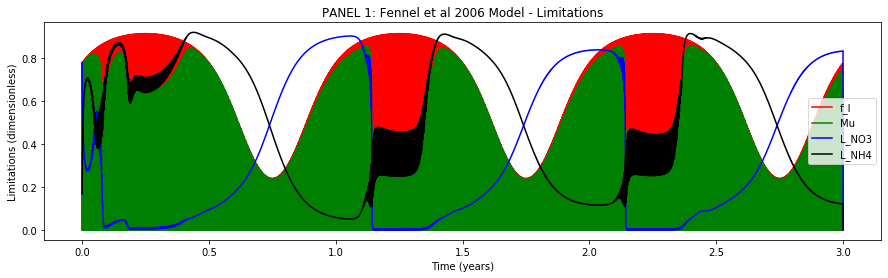

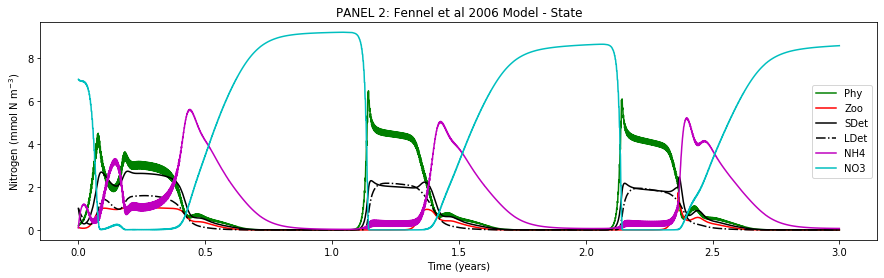

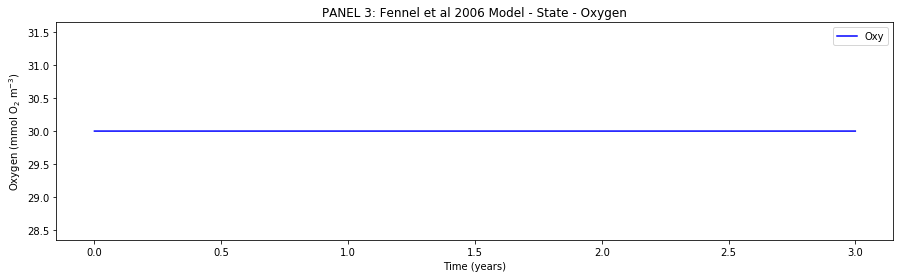

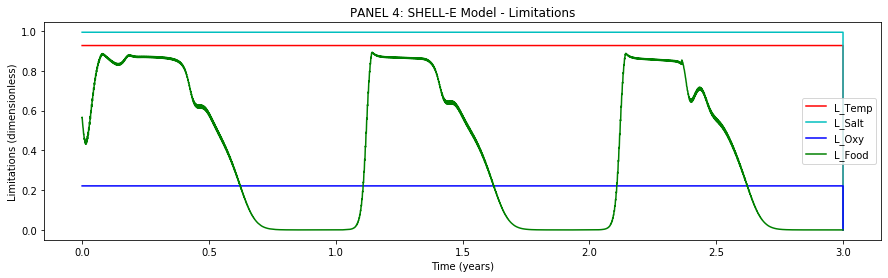

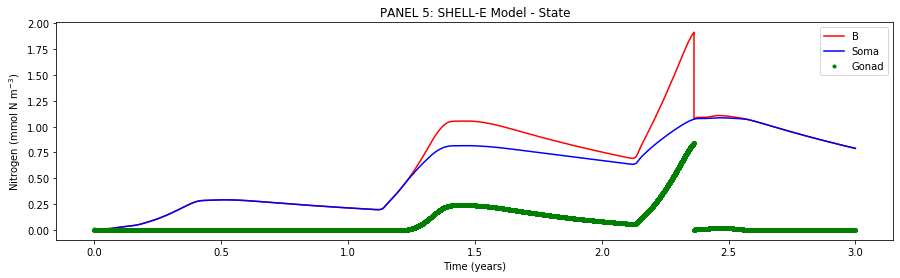

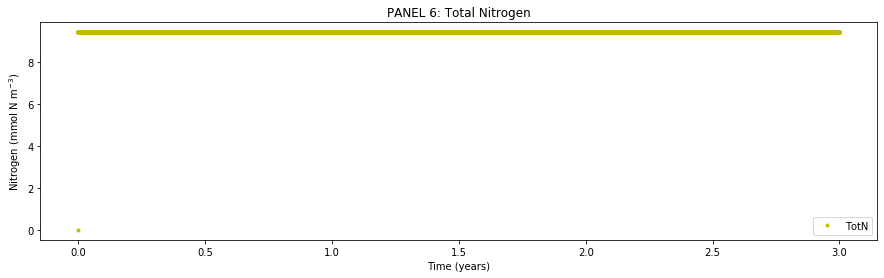

In [15]:
#%% IMPROVED model_NPZD2_SHELLE
import model_NPZD2_SHELLE_improved as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
model.plot(output)

<div class="Q"><br>
Panel 1, in winter (e.g. year 0.75), what variable is most limiting to phytoplankton growth?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 1, in summer (e.g. year 1.25), what variable is most limiting to phytoplankton growth?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 1, in spring (e.g. year 1.0), what variable is most limiting to phytoplankton growth?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 1, in spring (e.g. year 1.0), why phytoplankton grows so well despite the low NH4 (i.e. NH4 is limiting)?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 1, in fall (e.g. year 1.45), why phytoplankton grows so well despite the low NO3 (i.e.  NO3 is limiting)?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 2, in late winter (e.g. year 1.0), where is most of the ecosystem nitrogen stored?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 2, in summer (e.g. year 1.25), where is most of the ecosystem nitrogen stored?


<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 3, what is the concentration of Oxygen?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 3, why is Oxygen concentration constant throughout the simulation?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 4, why is the mussel limitation by Oxygen (L_Oxy) constant throughout the simulation?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 4, in winter (e.g. year 0.75), what variable is most limiting to mussel growth?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 4, in summer (e.g. year 1.25), what variable is most limiting to mussel growth?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
Panel 5, how many times the mussel spawned during the 3 year simulation?

<br><br><div class="qhelp"></div></div>

----------------

# Expanding the model from a 1 m$^3$ cube to a whole pond with many mussels

So far our models have been a 1m X 1m X 1m box (i.e. a 1 m$^3$ cube). Now we are going to expand the model to a whole pond of dimensions of our choosing. Additionally, the expanded model will also represents MANY **identical** mussels growing inside a pond, where Phytoplankton, Zooplankton, Nutrients and Detritus interact with the mussels (temp is constant).


<img src="./NPZD2_SHELLE_pond.png" width="800px">

<br>
<br>

In spyder, save as <span class='file'>model_NPZD2_SHELLE_improved.py</span> with the following name: <span class='file'>model_NPZD2_SHELLE_pond.py</span>

You can see the final <span class='file'>model_NPZD2_SHELLE_pond.py</span> in <span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week6/model_NPZD2_SHELLE_pond.py" target="__blank">HERE</a></span> 

-------------------------

#### Adding the new parameters

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Replace the following in the `# Parameters` section...

Original:

```
    # Parameters
    par = {}
    # NPZD2
    par['mu0']   = 0.69  
    par['kNO3']  = 0.5    
    par['kNH4']  = 0.5  
    par['alpha'] = 0.125  
    par['gmax']  = 0.6
    par['kP']    = 0.44
    par['mP']    = 0.15    
    par['tau']   = 0.005 
    par['thetaMax'] = 0.053
    par['beta']  = 0.75 
    par['lBM']   = 0.1    
    par['lE']    = 0.1
    par['mZ']    = 0.25
    par['rSD']   = 0.3
    par['rLD']   = 0.1 
    par['nmax']  = 0.05
    par['kI']    = 0.1
    par['I0']    = 0.0095
```

Now:

```
    # Parameters
    par = {}
    # Physical characteristics of embayment
    par['X'] = 1. # Basin length
    par['Y'] = 1. # Basin width
    par['Z'] = 1. # Basin depth
    par['V'] = par['X'] * par['Y'] * par['Z']
    # NPZD2
    par['mu0']   = 0.69  
    par['kNO3']  = 0.5    
    par['kNH4']  = 0.5  
    par['alpha'] = 0.125  
    par['gmax']  = 0.6
    par['kP']    = 0.44
    par['mP']    = 0.15    
    par['tau']   = 0.005 
    par['thetaMax'] = 0.053
    par['beta']  = 0.75 
    par['lBM']   = 0.1    
    par['lE']    = 0.1
    par['mZ']    = 0.25
    par['rSD']   = 0.3
    par['rLD']   = 0.1 
    par['nmax']  = 0.05
    par['kI']    = 0.1
    par['I0']    = 0.0095
```


-------------------------

#### Adding new "Initial Conditions" for the number of mussels in the pond

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

In the `# Initial conditions` section...

Add the following:


In [ ]:
    InitCond['n_muss'] = 1.

-------------------------

#### Create new zero vectors

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

In the `# Create zero-vectors` section...

Add the following:


In [ ]:
    n_muss = np.zeros((NoSTEPS,),float) # same as above
    B_total = np.zeros((NoSTEPS,),float) # Total Biomass of mussels in Embayment 

-------------------------

#### Initialize new variables


In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

In the `# Initializing with initial conditions` section...

Add the following:


In [ ]:
    n_muss[0] = InitCond['n_muss']
    B_total[0] = B[0] * n_muss[0] / par['V']

-------------------------


#### Modify the calculation of Total-Nitrogen

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Replace the following in the `# Estimate Total Nitrogen` section...

Original:

```
        TotN[t+1] = Phy[t+1] + Zoo[t+1] + SDet[t+1] + LDet[t+1] + NH4[t+1] + NO3[t+1] + B[t+1]

```

Now:

```
        TotN[t+1] = Phy[t+1] + Zoo[t+1] + SDet[t+1] + LDet[t+1] + NH4[t+1] + NO3[t+1] + ((B[t+1]*n_muss[t+1])/par['V'])
```


-------------------------

#### Population spawning

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Replace the following in the `# Spawning` section...

Original:

```
            Zoo[t] =  Zoo[t] + Spawning[t] # Spawning biomass becomes zooplankton
```

Now:

```
            Zoo[t] =  Zoo[t] + ((Spawning[t]*n_muss[t])/par['V']) # Spawning biomass becomes zooplankton
```


-------------------------


#### Population defecation

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Replace the following in the `#Feedback to NPZD2 model` section...

Original:

```
        dLDetdt = dLDetdt + Fae 
```

Now:

```
        dLDetdt = dLDetdt + (Fae*(n_muss[t]/par['V'])) 
```


-------------------------


#### Population effect on planktonic ecosystem

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Replace the following in the `#Feedback to NPZD2 model` section...

Original:

```
        dPhydt =  dPhydt-(F[t] *par['epsilonP']*Phy[t])
        dZoodt =  dZoodt-(F[t] *par['epsilonZ']*Zoo[t])
        dSDetdt = dSDetdt -(F[t] *par['epsilonD']*SDet[t])
```

Now:

```
        dPhydt =  dPhydt-((F[t] *par['epsilonP']*Phy[t])*(n_muss[t]/par['V']))
        dZoodt =  dZoodt-((F[t] *par['epsilonZ']*Zoo[t])*(n_muss[t]/par['V']))
        dSDetdt = dSDetdt -((F[t] *par['epsilonD']*SDet[t])*(n_muss[t]/par['V']))
```


-------------------------


#### Population respiration (excretion of ammonia)

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Replace the following in the `#Feedback to NPZD2 model` section...

Original:

```
        dNH4dt = dNH4dt + R[t]
```

Now:

```
        dNH4dt = dNH4dt + (R[t]*n_muss[t]/par['V']) 
```


-------------------------


#### Population dynamics

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Add the following BEFORE the `# Update and step` section:


In [ ]:
        # Population dynamics of mussels
        dn_mussdt = 0

-------------------------


#### Time-stepping Population and total biomass

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Add the following AT THE END of the `# Update and step` section:


In [ ]:
        B_total[t+1] =  B[t+1] * n_muss[t+1] / par['V']
        n_muss[t+1] = n_muss[t] + (dn_mussdt * dt)    

-------------------------


#### Add new output variables

In <span class='file'>model_NPZD2_SHELLE_pond.py</span>, do the following modifications:

Add the following AT THE END of the `# Pack output into dictionary` section:


In [ ]:
    output['B_total'] = B_total
    output['n_muss'] = n_muss

----------------------------------------

Lets plot the new **model_NPZD2_SHELLE_pond** to see how it looks.

Initially, we will make our basin of dimensions of 1m X 1m X 1m, and will add only 1 mussel. This should yield exactly the same results as our original model. 


<img src="./NPZD2_SHELLE NPZD2_SHELLE_pond comparison.png" width="800px">

<br>
<br>



<div class="c2c"></div>

Model run: DONE!!!
*************************** Output from model_NPZD2_SHELLE_embayment ***************************


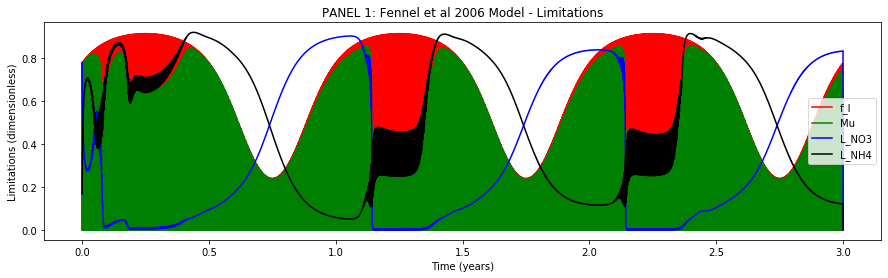

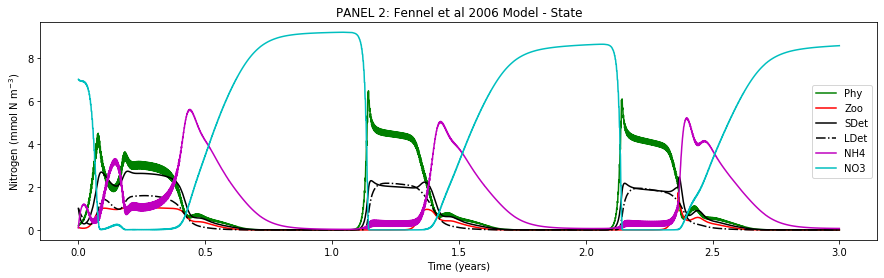

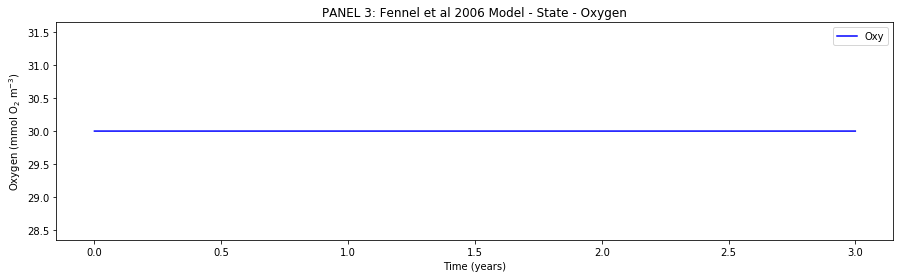

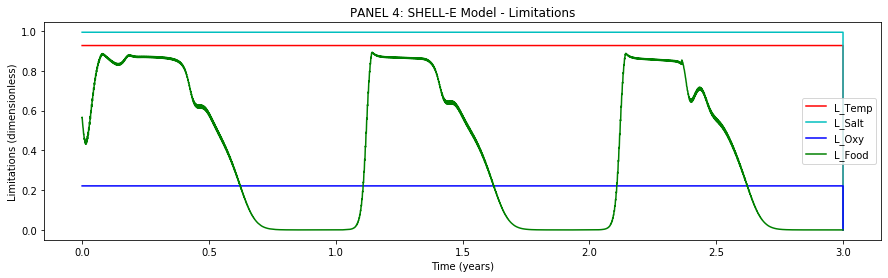

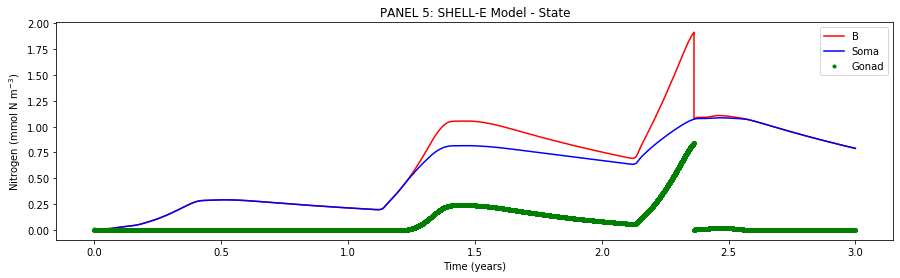

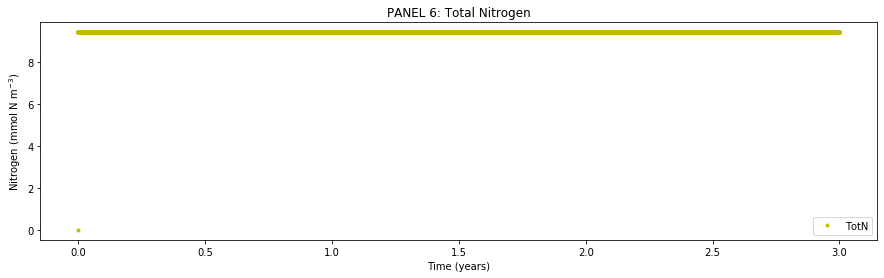

In [17]:
#%% IMPROVED model_NPZD2_SHELLE
import model_NPZD2_SHELLE_pond as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
print('*************************** Output from model_NPZD2_SHELLE_pond ***************************')
model.plot(output)

<div class="Q"><br>

Can you see any differences in the graphs from our original 1m3 cube model, versus the graphs from our new 1m X 1m X 1m small basin?

<br><br><div class="qhelp"></div></div>

----------------------------------------

Lets take a closer look by plotting the `Phy` from the two model runs. That is the `Phy` from a run with our original 1 m$^3$ cube versus `Phy` from our new 1m X 1m X 1m basin model: 
<div class="c2c"></div>

Model run: DONE!!!
Model run: DONE!!!


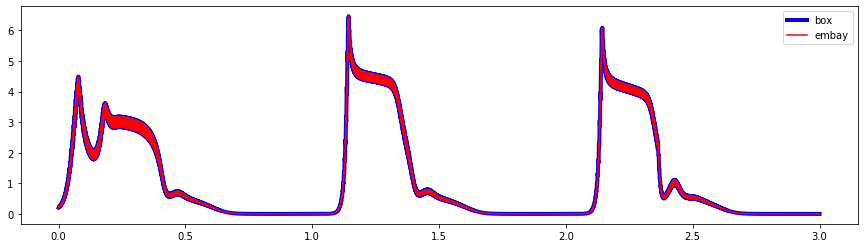

In [27]:
import model_NPZD2_SHELLE as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
box = model.run(days,dt,InitCond,par)

import model_NPZD2_SHELLE_pond as model
reload(model)

days, dt, par, InitCond = model.load_defaults()
embay = model.run(days,dt,InitCond,par)


import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(box['time']/365,box['Phy'],'b-',linewidth='4')
ax.plot(embay['time']/365,embay['Phy'],'r-')
plt.legend(['box','embay'])


<div class="Q"><br>

Is phytoplankton in the original model_NPZD2_SHELLE.py the same as phytoplankton in model_NPZD2_SHELLE_pond.py  when the pond is made to be 1 x 1 x 1 meters?

<br><br><div class="qhelp"></div></div>

This is great!

Now lets do a run in a larger pond! 

### Larger pond

Lets do a pond of 2000 m length X 100 m width X 10 m depth:

<img src="./NPZD2_SHELLE_pond.png" width="800px">

<br>
<br>

<div class="c2c"></div>

Model run: DONE!!!
******* Output from model_NPZD2_SHELLE_pond LARGE pond ***************************


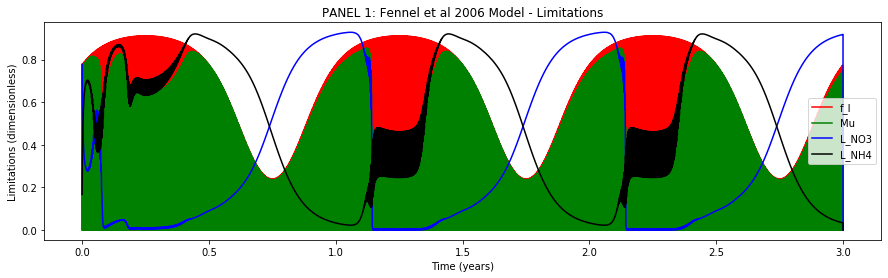

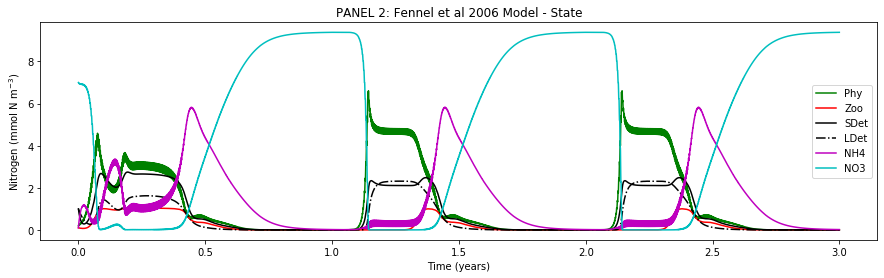

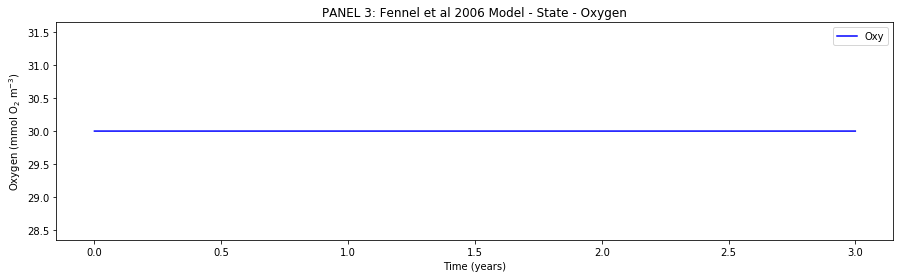

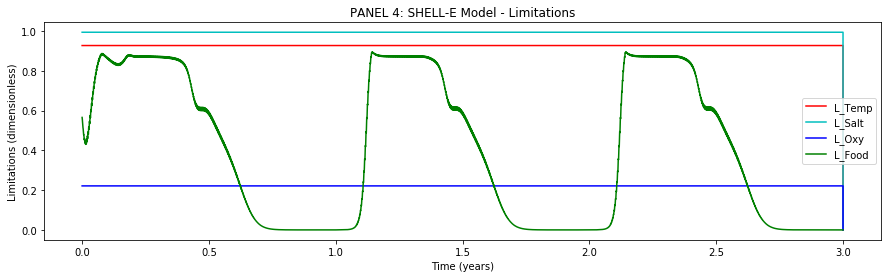

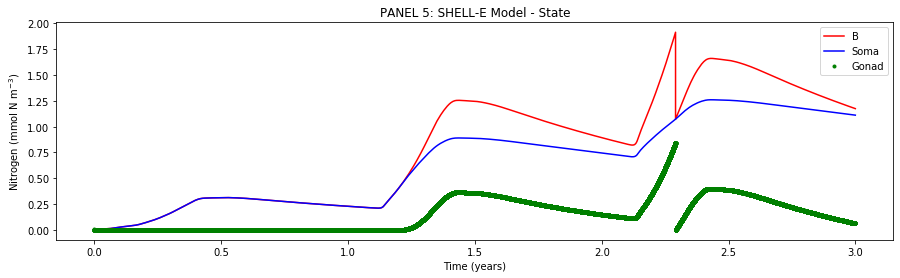

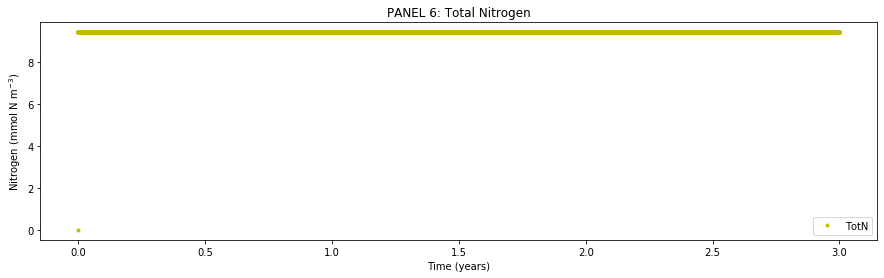

In [25]:
import model_NPZD2_SHELLE_pond as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
    
output = model.run(days,dt,InitCond,par)
print('******* Output from model_NPZD2_SHELLE_pond LARGE pond ***************************')
model.plot(output)

<div class="Q"><br>

Can you see any differences between the small 1 X 1 X 1 m3 box and the large pond?

<br><br><div class="qhelp"></div></div>

As mentioned before, the number of spawning events is a good diagnostic to see if mussels are growing at the same rate.

<div class="Q"><br>

Panel 5, how many times the mussel spawned during the 3 year simulation?

<br><br><div class="qhelp"></div></div>

Lets take a closer look by comparing `Phy` from the 2 runs.
 
<div class="c2c"></div>

Model run: DONE!!!
Model run: DONE!!!


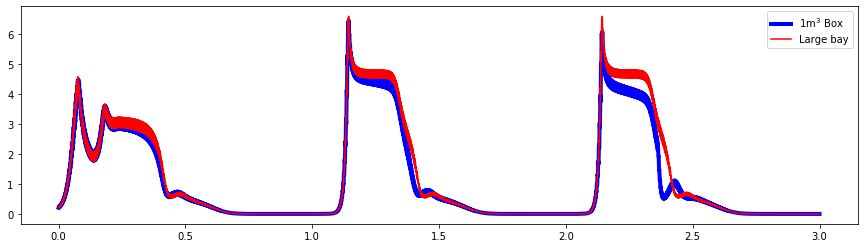

In [20]:
import model_NPZD2_SHELLE_pond as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
par['X'] = 1.# Basin length
par['Y'] = 1. # Basin width
par['Z'] = 1.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
out_1m = model.run(days,dt,InitCond,par)

import model_NPZD2_SHELLE_pond as model
reload(model)

days, dt, par, InitCond = model.load_defaults()
par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
out_large = model.run(days,dt,InitCond,par)

import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(out_1m['time']/365,out_1m['Phy'],'b-',linewidth='4')
ax.plot(out_large['time']/365,out_large['Phy'],'r-')
plt.legend(['1m$^3$ Box','Large bay'])


<div class="Q"><br>

Can you see any differences in <b>Phy</b> between the small 1 X 1 X 1 m3 box and the large pond?

<br><br><div class="qhelp"></div></div>

One would think that the one mussel in a small 1 m$^3$ cube should run out of food faster compared to the one mussel living in a 2 million m$^3$ basin. However, mussels in both cases are mainly limited by oxygen and not by food. Lets run the model in a scenario with more oxygen: 
 
<div class="c2c"></div>

Model run: DONE!!!


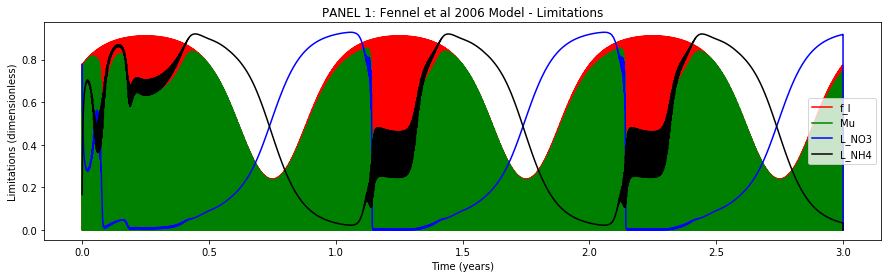

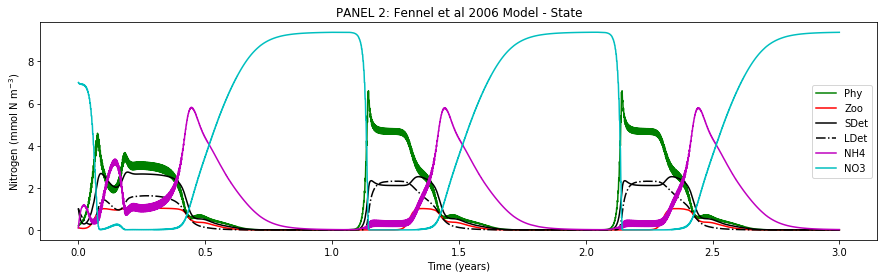

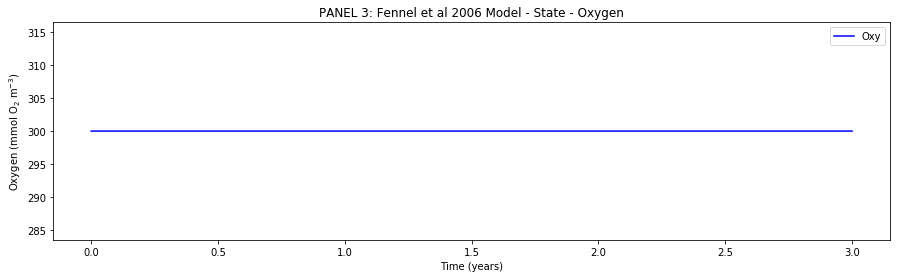

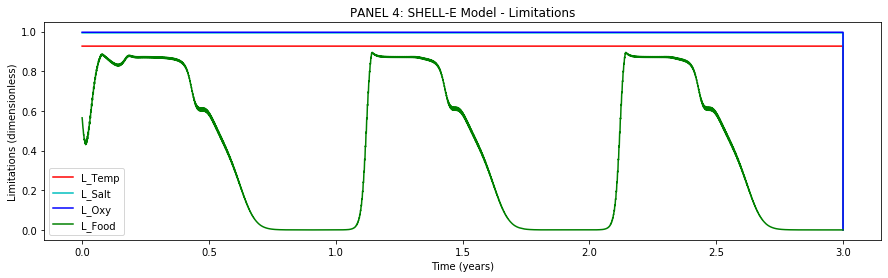

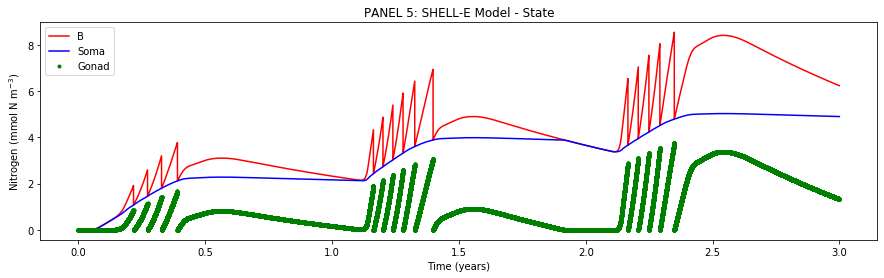

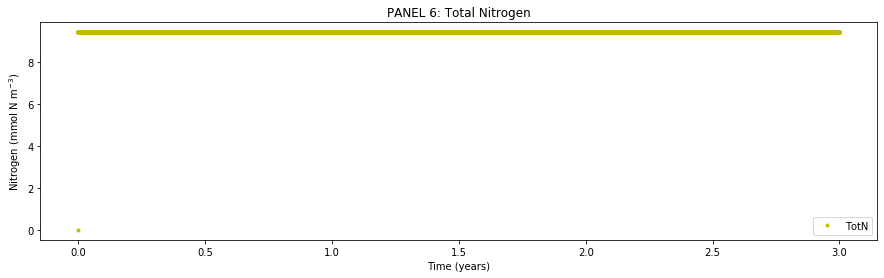

In [21]:
import model_NPZD2_SHELLE_pond as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
InitCond['Oxy'] = 300. #Oxygen
    
output = model.run(days,dt,InitCond,par)
model.plot(output)

<div class="Q"><br>

Panel 3, what is the concentration of Oxygen?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Panel 5, how many times the mussel spawned during the 3 year simulation?

<br><br><div class="qhelp"></div></div>

Lets take a closer look by comparing `Phy` from the 2 runs again, but this time with lots of oxygen.
 
<div class="c2c"></div>

Model run: DONE!!!
Model run: DONE!!!


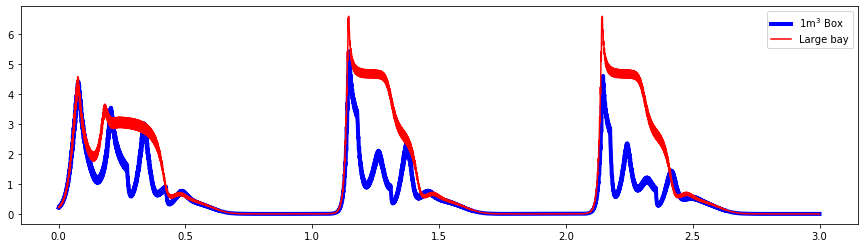

In [22]:
import model_NPZD2_SHELLE_pond as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
par['X'] = 1.# Basin length
par['Y'] = 1. # Basin width
par['Z'] = 1.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
InitCond['Oxy'] = 300. #Oxygen
out_1m = model.run(days,dt,InitCond,par)

import model_NPZD2_SHELLE_pond as model
reload(model)

days, dt, par, InitCond = model.load_defaults()
par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']
InitCond['Oxy'] = 300. #Oxygen
out_large = model.run(days,dt,InitCond,par)

import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(out_1m['time']/365,out_1m['Phy'],'b-',linewidth='4')
ax.plot(out_large['time']/365,out_large['Phy'],'r-')
plt.legend(['1m$^3$ Box','Large bay'])


<div class="Q"><br>

Why was <b>Phy</b> lower in the 1 m$^3$ cube model (compared to <b>Phy</b> in the large basin)?

<br><br><div class="qhelp"></div></div>

Now that we know that oxygen can be very important, lets "oxygen dynamics" to our model.

----------------

# Adding Oxygen dynamics


In spyder, save as <span class='file'>model_NPZD2_SHELLE_pond.py</span> with the following name: <span class='file'>model_NPZD2_SHELLE_pond_O2.py</span>

We are going to add a bunch of code (see below). However you can see the final <span class='file'>model_NPZD2_SHELLE_pond_O2.py</span> in <span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week6/model_NPZD2_SHELLE_pond_O2.py" target="__blank">HERE</a></span> 

In [ ]:
        # Oxygen sub-model =========================================
        
        # Parameters
        OA0 = 2.00907       # Oxygen
        OA1 = 3.22014       # saturation
        OA2 = 4.05010       # coefficients
        OA3 = 4.94457
        OA4 =-0.256847
        OA5 = 3.88767
        OB0 =-0.00624523
        OB1 =-0.00737614
        OB2 =-0.0103410
        OB3 =-0.00817083
        OC0 =-0.000000488682
        rOxNO3= 8.625       # 138/16
        rOxNH4= 6.625       # 106/16
        l2mol = 1000.0/22.9316 # liter to mol
        
        #-----------------------------------------------------------------------
        #  Surface O2 gas exchange.
        #-----------------------------------------------------------------------
        
        #  Compute surface O2 gas exchange.
        cff2=0.31*(24.0/100.0)
        
        #  Compute O2 transfer velocity : u10squared (u10 in m/s)
        u10squ=(par['uwind']*par['uwind'])+(par['vwind']*par['vwind'])
        
        # Calculate the Schmidt number for O2 in sea water (Wanninkhof, 1992).
        SchmidtN_Ox=1953.4-Temp[t]*(128.0-Temp[t]*(3.9918-Temp[t]*0.050091))
        cff3=cff2*u10squ*np.sqrt(660.0/SchmidtN_Ox)        
        
        #  Calculate O2 saturation concentration using Garcia and Gordon
        #  L&O (1992) formula, (EXP(AA) is in ml/l).        
        TS=np.log((298.15-Temp[t])/(273.15+Temp[t]))        
        
        AA=OA0+TS*(OA1+TS*(OA2+TS*(OA3+TS*(OA4+TS*OA5))))+ \
           Salt[t]*(OB0+TS*(OB1+TS*(OB2+TS*OB3)))+ \
           OC0*Salt[t]*Salt[t]
        
        # Convert from ml/l to mmol/m3.
        O2satu=l2mol*np.exp(AA)        
        
        # Add in O2 gas exchange.
        O2_Flux = cff3*(O2satu-Oxy[t])
        
        airwater_O2_flux[t] = O2_Flux * (1./par['Z'])
        
        dOxydt = airwater_O2_flux[t]
        
        
        # Production via Photosynthesys
        dOxydt = dOxydt + (muMax * f_I[t] * L_NO3[t] * Phy[t] * rOxNO3) # New production
        dOxydt = dOxydt + (muMax * f_I[t] * L_NH4[t] * Phy[t] * rOxNH4) # Regenerated production
        
        # Respiration
        dOxydt = dOxydt - (((par['lBM']*Zoo[t]) - \
                           (par['lE']*((Phy[t]**2)/(par['kP']+(Phy[t]**2)))*par['beta']*Zoo[t]) - \
                           (par['mZ']*(Zoo[t]**2))) * rOxNH4) # Zooplankton
 
        dOxydt = dOxydt - ((n * n_O2 * NH4[t])* rOxNH4 * 2) # Nitrification 
 
        dOxydt = dOxydt - (((par['rSD']*SDet[t])+(par['rLD']*LDet[t])) * rOxNH4) #S and L Detritus remineralization
        
        dOxydt = dOxydt - (((R[t]*n_muss[t])/par['V']) * rOxNH4)  #Respiration by mussels

In [ ]:
    # Other physical parameters (for Oxygen exchange with Atmosphere)
    par['uwind'] = 0.01
    par['vwind'] = 0.01

In [ ]:
    airwater_O2_flux = np.zeros((NoSTEPS,),float) # same as above

After `n = par['nmax'] * (1 - max(0,(I[t]-par['I0'])/(par['kI']+I[t]-par['I0'])))`

In [ ]:
        n_O2 = (Oxy[t]/(3.+Oxy[t]))

In [ ]:
        dNO3dt = -(muMax * f_I[t] * L_NO3[t] * Phy[t]) + \
                  (n * n_O2 * NH4[t])
                 
        dNH4dt = -(muMax * f_I[t] * L_NH4[t] * Phy[t]) - \
                  (n * n_O2 * NH4[t]) + \
                  (par['lBM'] * Zoo[t]) + \
                  (par['lE']*((Phy[t]**2)/(par['kP']+(Phy[t]**2)))*par['beta']*Zoo[t]) + \
                  (par['rSD']*SDet[t]) + \
                  (par['rLD']*LDet[t])

In [ ]:
        Oxy[t+1]  = max(0,Oxy[t] +  (dOxydt * dt))

In [ ]:
    output['Oxy'] = Oxy
    output['L_Oxy'] = L_Oxy

Lets play with the new model...

Model run: DONE!!!


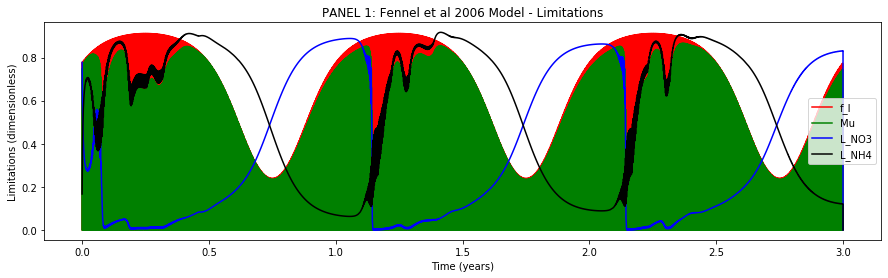

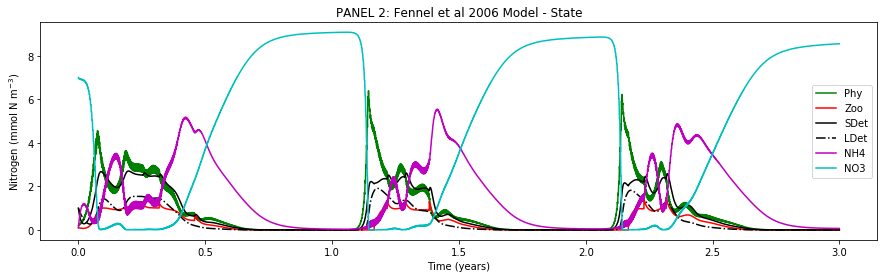

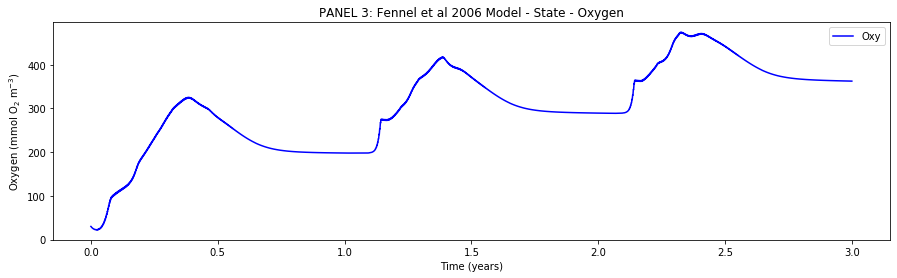

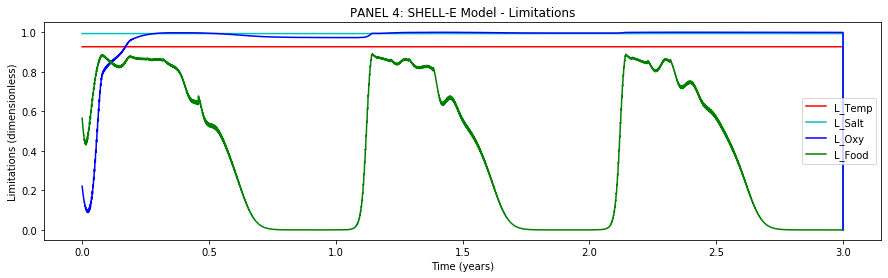

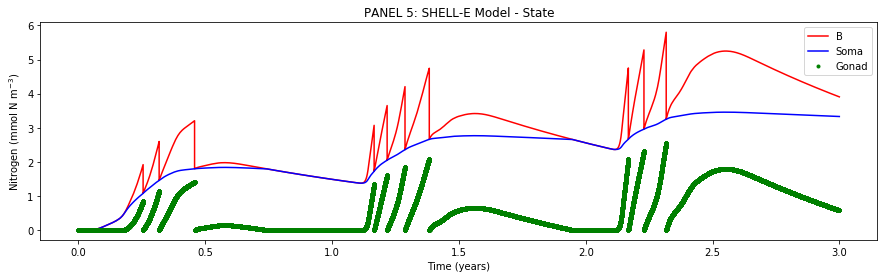

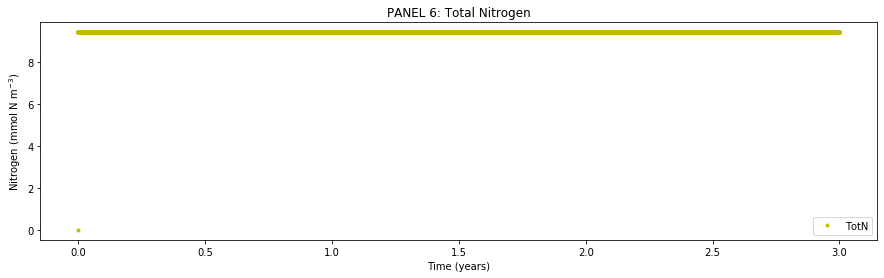

In [23]:
import model_NPZD2_SHELLE_pond_O2 as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

InitCond['n_muss'] = 4 * 10**5. # number of mussels in basin    
    
output = model.run(days,dt,InitCond,par)
model.plot(output)

Model run: DONE!!!


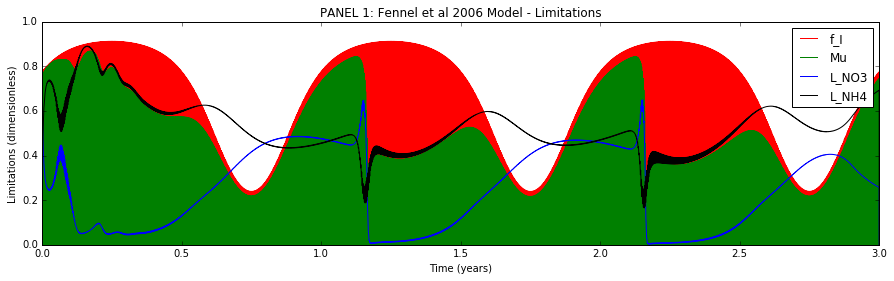

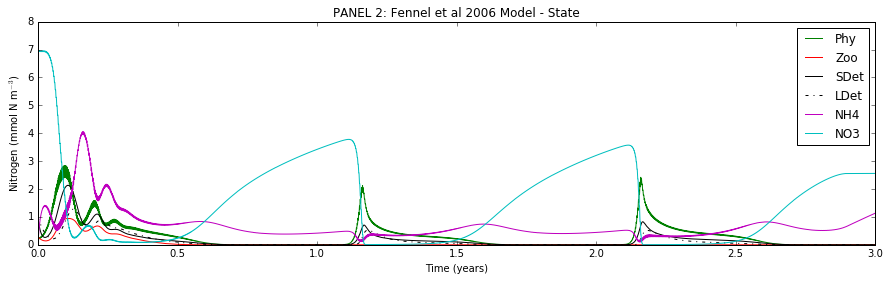

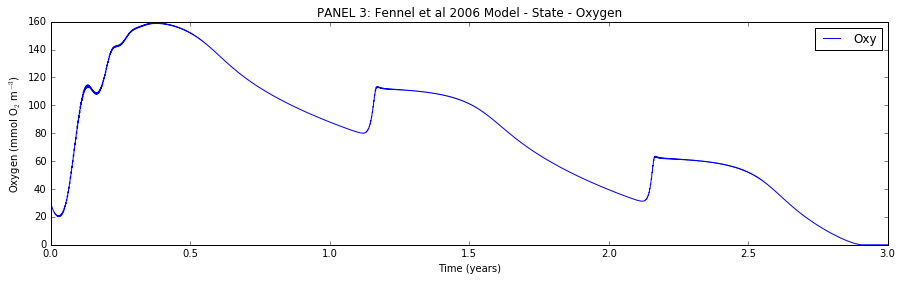

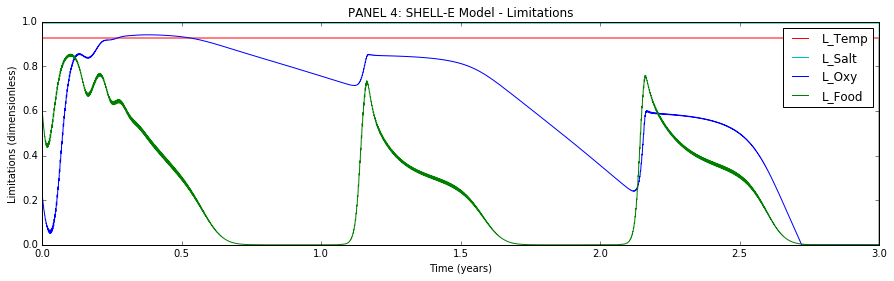

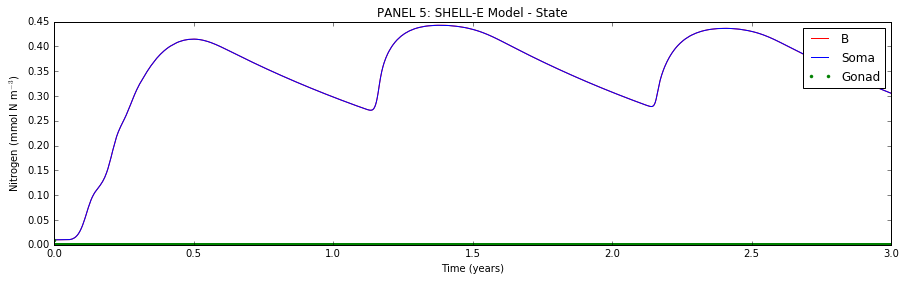

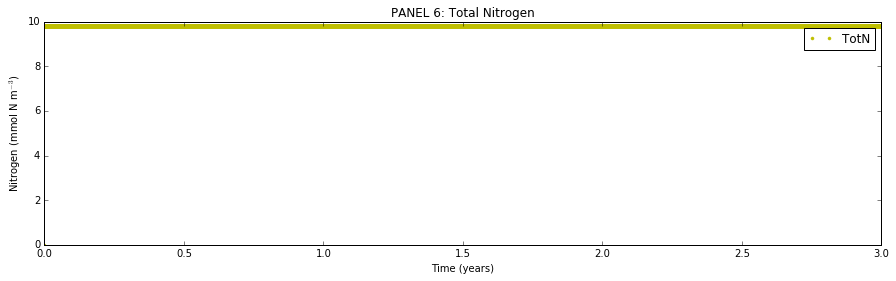

In [37]:
import model_NPZD2_SHELLE_pond_O2 as model
reload(model)

days, dt, par, InitCond = model.load_defaults()

par['X'] = 2000.# Basin length
par['Y'] = 100. # Basin width
par['Z'] = 10.  # Basin depth
par['V'] = par['X'] * par['Y'] * par['Z']

InitCond['n_muss'] = 4 * 10**7. # number of mussels in basin    
    
output = model.run(days,dt,InitCond,par)
model.plot(output)

<div class="Q"><br>

Run the model SEVERAL times with different amounts of mussels, i.e. InitCond['n_muss'], and make a graph where you plot mussel density versus Average Oxygen Concentration (take a look at the hints below).
<br><br>
Include your plotting-code and the resulting plot.

<br><br><div class="qhelp"></div></div>

**Hints for Question 22**

* You need to figure out where is the "oxygen" data generated by the model... and also what "type of object" is the data stored in.
* You need to figure what **function** you need to use (in Python) to calculate "the average" of a group of numbers. You can Google something like "how to calculate average in python".
* You need to run the model several times with varying amounts of mussels. The question is "do you need to add dozens, hundreds, thousands or millions of mussels, to make a difference in the average oxygen concentration... to answer this question you need to take a look at the size of the embayment, before you take an "educated guess". 
* If you need to add a lot of mussels, you may want to use "scientific notation" to define the number of mussels. That is, use `10**6` rather than `1000000`.
* You need to know how to do a plot in Python... you can take a look at examples above (or from previous labs)... OR you can take a look at the example below.
* You can run the model "manually" several times, and record the output "by hand". OR if you feel adventurous, you can write a "for loop" to speed up the process.

Text(0, 0.5, 'y')

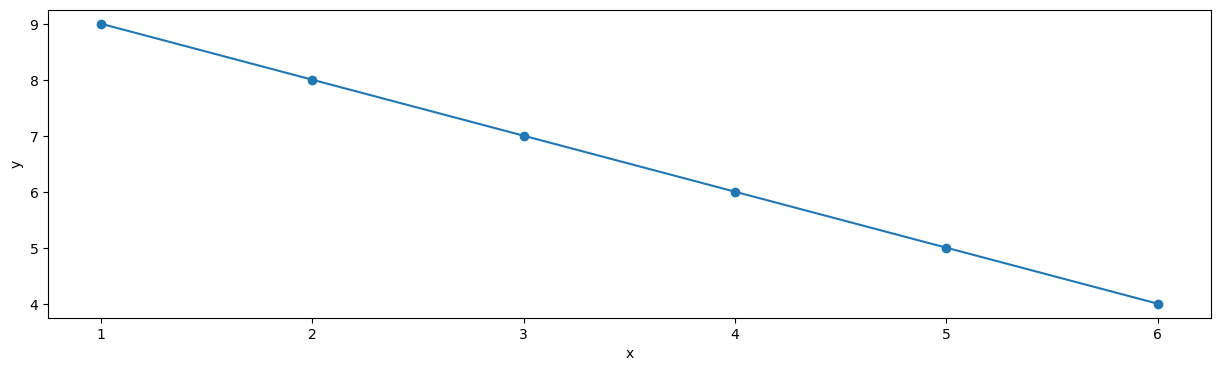

In [9]:
# Hint for Questions 22 (generic code to make a plot)

import matplotlib.pyplot as plt

# Here is generic data
x = [1,2,3,4,5,6]
y = [9,8,7,6,5,4]

fig, (ax) = plt.subplots(1,1,figsize=(15, 4)) # Make empty graph 
ax.plot(x,y,'o-') # Plot line (with dots) in graph
plt.xlabel('x') # Add x label
plt.ylabel('y') # Add y label

_Please beware that this model was designed as a teaching tool and may not be adequate to represent realistic applications_.

# **This is the end of lab**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [1]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
def css():
    style = open("../css/custom.css", "r").read()
    return HTML(style)
css()